# Preprocessing

You have to mount drive. Have augumented zip folder in drive. Once you run this all models will be saved in drive automatically. The epoch graphs are visible here save the images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
zip_file_path = '/content/drive/My Drive/augmented.zip'

# Path to extract the contents of the zip file
extract_path = '/content/dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input size based on the model architecture (e.g., 227x227 for AlexNet)
input_size = (227, 227)

# Create data generator with augmentation and normalization
data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% for training, 20% for validation
)

# Create data generator for both training and validation
train_generator = data_generator.flow_from_directory(
    '/content/dataset/augmented',
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'  # specify 'training' for the training set
)

val_generator = data_generator.flow_from_directory(
    '/content/dataset/augmented',
    target_size=input_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # specify 'validation' for the validation set
)


Found 1245 images belonging to 6 classes.
Found 309 images belonging to 6 classes.


# Alexnet

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
n_classes=6
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227, 227, 3), kernel_size=(11, 11), strides=(4, 4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11, 11), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(n_classes))  # 6 units for 6 categories
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)


Epoch 1/10
39/39 [==============================] - 224s 6s/step - loss: 0.7458 - accuracy: 0.7639 - val_loss: 195.6291 - val_accuracy: 0.2265
Epoch 2/10
39/39 [==============================] - 216s 6s/step - loss: 0.2124 - accuracy: 0.9237 - val_loss: 21.5019 - val_accuracy: 0.4401
Epoch 3/10
39/39 [==============================] - 227s 6s/step - loss: 0.2063 - accuracy: 0.9382 - val_loss: 2.3099 - val_accuracy: 0.4401
Epoch 4/10
39/39 [==============================] - 220s 6s/step - loss: 0.1940 - accuracy: 0.9373 - val_loss: 2.9828 - val_accuracy: 0.3528
Epoch 5/10
39/39 [==============================] - 221s 6s/step - loss: 0.0922 - accuracy: 0.9711 - val_loss: 6.1751 - val_accuracy: 0.4531
Epoch 6/10
39/39 [==============================] - 224s 6s/step - loss: 0.0677 - accuracy: 0.9783 - val_loss: 7.2239 - val_accuracy: 0.5243
Epoch 7/10
39/39 [==============================] - 217s 6s/step - loss: 0.1607 - accuracy: 0.9550 - val_loss: 11.4345 - val_accuracy: 0.4887
Epoch 8/1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.evaluate(val_generator)

10/10 [==============================] - 15s 1s/step - loss: 7.7774 - accuracy: 0.5405


[7.777358055114746, 0.5404530763626099]

epoch

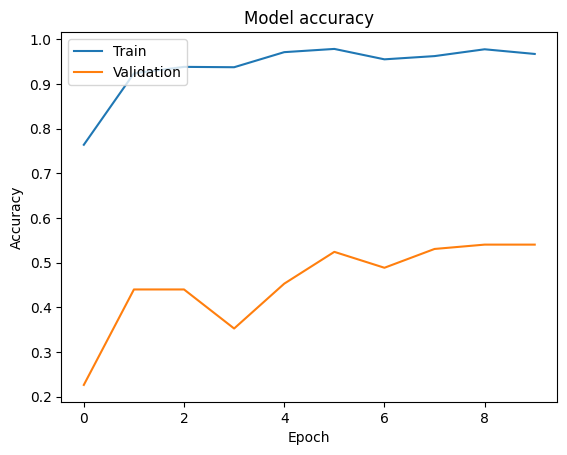

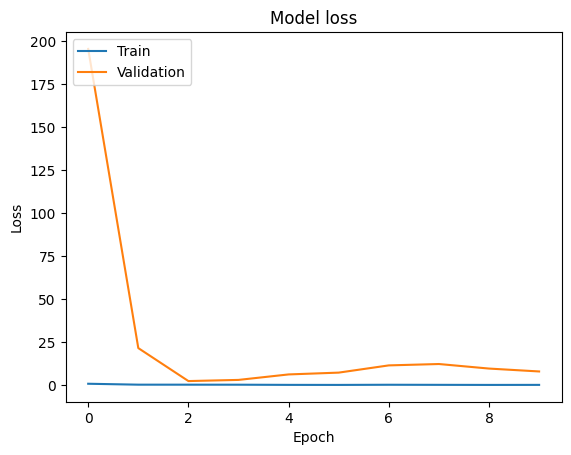

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('alexnet_accuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('alexnet_loss.png')
plt.show()


In [24]:
import shutil
model_file = "alexnet_model.h5"
model.save(model_file)
drive_path = "/content/drive/My Drive/"

# Move the model to Drive
shutil.move(model_file, drive_path + model_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/My Drive/alexnet_model.h5'

# Resnet

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

# Create the ResNet50 base model (pre-trained on ImageNet)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Build a custom ResNet-based model
resmodel = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')  # 6 output units for 6 categories
])
# Compile the model
resmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [26]:
# Train the model
reshistory = resmodel.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/10
38/38 [==============================] - 343s 9s/step - loss: 1.8907 - accuracy: 0.2119 - val_loss: 1.7691 - val_accuracy: 0.2257
Epoch 2/10
38/38 [==============================] - 337s 9s/step - loss: 1.7501 - accuracy: 0.2523 - val_loss: 1.7327 - val_accuracy: 0.2326
Epoch 3/10
38/38 [==============================] - 316s 8s/step - loss: 1.7238 - accuracy: 0.2894 - val_loss: 1.7369 - val_accuracy: 0.3125
Epoch 4/10
38/38 [==============================] - 314s 8s/step - loss: 1.6796 - accuracy: 0.3355 - val_loss: 1.6895 - val_accuracy: 0.3229
Epoch 5/10
38/38 [==============================] - 336s 9s/step - loss: 1.6495 - accuracy: 0.3438 - val_loss: 1.6563 - val_accuracy: 0.3542
Epoch 6/10
38/38 [==============================] - 344s 9s/step - loss: 1.6622 - accuracy: 0.3578 - val_loss: 1.6930 - val_accuracy: 0.3333
Epoch 7/10
38/38 [==============================] - 353s 9s/step - loss: 1.6114 - accuracy: 0.3702 - val_loss: 1.6365 - val_accuracy: 0.3333
Epoch 8/10
38

In [27]:
resmodel.evaluate(val_generator)

10/10 [==============================] - 68s 7s/step - loss: 1.6081 - accuracy: 0.3139


[1.6081193685531616, 0.31391584873199463]

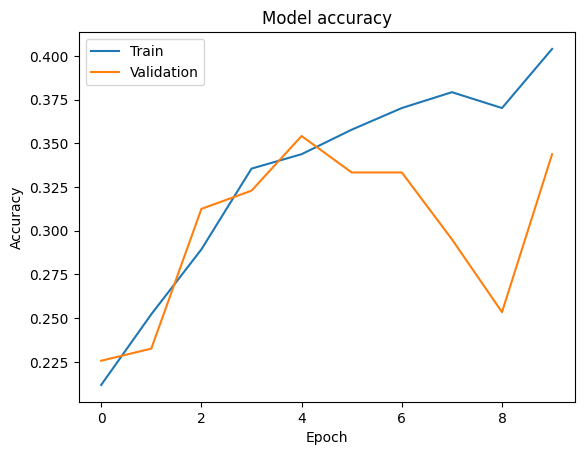

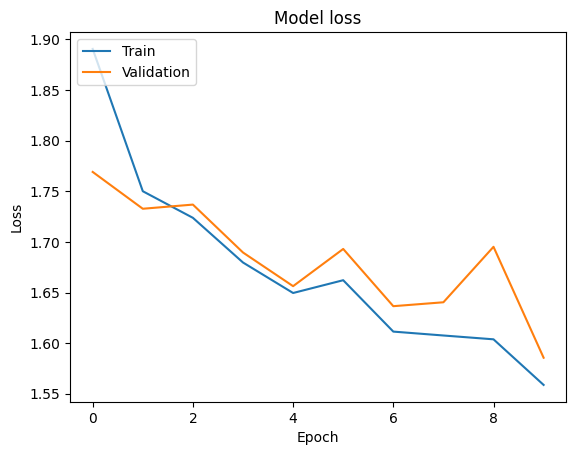

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(reshistory.history['accuracy'])
plt.plot(reshistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('alexnet_accuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(reshistory.history['loss'])
plt.plot(reshistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('resnet_loss.png')
plt.show()


In [29]:
import shutil
model_file = "resnet_model.h5"
model.save(model_file)
drive_path = "/content/drive/My Drive/"

# Move the model to Drive
shutil.move(model_file, drive_path + model_file)

'/content/drive/My Drive/resnet_model.h5'

# Densenet



In [30]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the DenseNet121 base model (pre-trained on ImageNet)
base_model_dense = DenseNet121(weights='imagenet', include_top=False, input_shape=(227, 227, 3))

# Freeze the layers of the base model
for layer in base_model_dense.layers:
    layer.trainable = False

# Build a custom DenseNet-based model
densenet_model = Sequential([
    base_model_dense,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')  # 6 output units for 6 categories
])

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


In [31]:
densenet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 7301446 (27.85 MB)
Trainable params: 263942 (1.01 MB)
Non-trainable params: 7037504 (26.85 MB)
_________________________________________________________________


In [32]:


# Train the model
dense_history = densenet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/25
38/38 [==============================] - 299s 8s/step - loss: 0.6476 - accuracy: 0.7923 - val_loss: 0.3583 - val_accuracy: 0.9549
Epoch 2/25
38/38 [==============================] - 253s 7s/step - loss: 0.1428 - accuracy: 0.9695 - val_loss: 0.2690 - val_accuracy: 0.9375
Epoch 3/25
38/38 [==============================] - 260s 7s/step - loss: 0.0731 - accuracy: 0.9885 - val_loss: 0.2355 - val_accuracy: 0.9340
Epoch 4/25
38/38 [==============================] - 255s 7s/step - loss: 0.0538 - accuracy: 0.9951 - val_loss: 0.1758 - val_accuracy: 0.9514
Epoch 5/25
38/38 [==============================] - 286s 8s/step - loss: 0.0328 - accuracy: 0.9975 - val_loss: 0.1736 - val_accuracy: 0.9444
Epoch 6/25
38/38 [==============================] - 285s 8s/step - loss: 0.0298 - accuracy: 0.9984 - val_loss: 0.1584 - val_accuracy: 0.9549
Epoch 7/25
38/38 [==============================] - 291s 8s/step - loss: 0.0252 - accuracy: 0.9984 - val_loss: 0.1631 - val_accuracy: 0.9549
Epoch 8/25
38

In [33]:
densenet_model.evaluate(val_generator)

10/10 [==============================] - 52s 5s/step - loss: 0.0845 - accuracy: 0.9741


[0.08445864170789719, 0.9741100072860718]

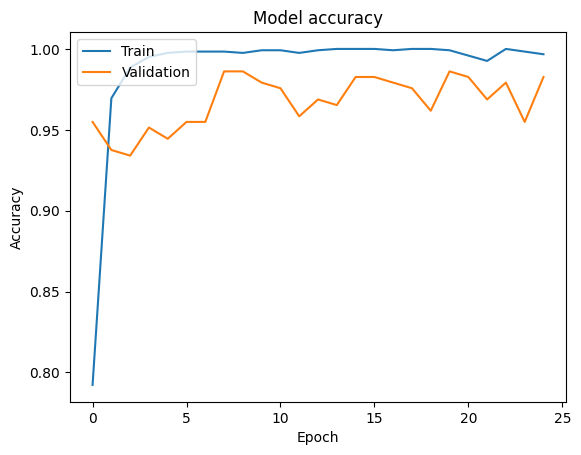

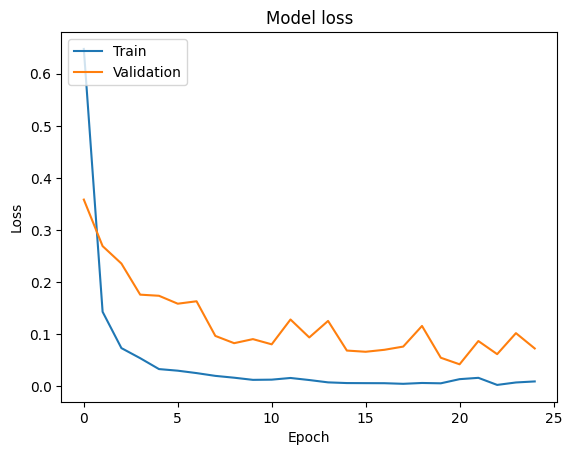

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(dense_history.history['accuracy'])
plt.plot(dense_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('dense_accuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(dense_history.history['loss'])
plt.plot(dense_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('dense_loss.png')
plt.show()


In [36]:
import shutil
model_file = "densenet_model.h5"
model.save(model_file)
drive_path = "/content/drive/My Drive/"

# Move the model to Drive
shutil.move(model_file, drive_path + model_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/My Drive/densenet_model.h5'